In [2]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D # sliding window me se jo bhi maximum pixel hoga wo mil jaega
from keras.layers import Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
single_dir_no_images = len(os.listdir("Gujarati/Train/A"))

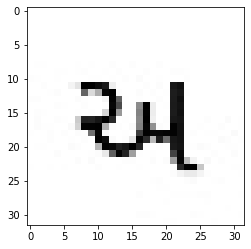

In [4]:
img_np_array = plt.imread(os.path.join("Gujarati/Train/A",
                                       os.listdir("Gujarati/Train/A")[0]))
plt.imshow(img_np_array, cmap="Reds")

In [6]:
def create_custom_cnn():
    
    input_layer=Input(shape=(32,32,3))

    first_conv_layer= Conv2D(filters=25, kernel_size=(5,5), activation="relu") (input_layer)

    second_conv_layer=Conv2D(filters=50, kernel_size=(7,7), activation="relu") (first_conv_layer)

    max_pool_out=MaxPooling2D(pool_size=(6,6), strides=(6,6))(second_conv_layer)

    flatten_layer=Flatten()(max_pool_out)

    network_output_layer=Dense(units=385, activation="softmax") (flatten_layer)
    
    return Model(inputs=input_layer, outputs=network_output_layer)

In [7]:
input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(max_pool1)
max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(max_pool2)
max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flatten_layer = Flatten()(max_pool3)
dense1 = Dense(256, activation='relu')(flatten_layer)
output_layer = Dense(385, activation='softmax')(dense1)  # Assuming num_classes is the number of output classes

cnn = Model(inputs=input_layer, outputs=output_layer)


In [8]:
cnn.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         Y          
                                                                            
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       Y          
                                                                            
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         Y          
 2D)                                                                        
                                                                            
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     Y          
                                                                            
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         Y          
 2D)                                                       

In [9]:
datagen = ImageDataGenerator(rescale=1/255.0)

In [10]:
print(datagen)

In [11]:
training_datagen = datagen.flow_from_directory(directory="Gujarati/Train",
                                               target_size=(32,32),
                                               classes=os.listdir("Gujarati/Train"),
                                               batch_size=512)

Found 53043 images belonging to 385 classes.


In [12]:
testing_datagen = datagen.flow_from_directory(directory="Gujarati/Test",
                                              target_size=(32,32),
                                              classes=os.listdir("Gujarati/Test"))

Found 23100 images belonging to 385 classes.


In [13]:
cnn.compile(loss="categorical_crossentropy",
                   metrics=[tf.keras.metrics.CategoricalAccuracy(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall()])

In [14]:
training_datagen

In [15]:
X_train_mb,Y_train_mb = training_datagen.__next__()

In [16]:
X_train_mb.shape

Y_train_mb.shape

(512, 385)

In [17]:
X_test_mb,Y_test_mb = testing_datagen.__next__()

X_test_mb.shape

Y_test_mb.shape

(32, 385)

In [19]:
cnn.fit(training_datagen,
               epochs=10,
               validation_data=testing_datagen)

Epoch 1/10
104/104 [==============================] - 162s 2s/step - loss: 4.1804 - categorical_accuracy: 0.1722 - precision: 0.8234 - recall: 0.0225 - val_loss: 3.3788 - val_categorical_accuracy: 0.2728 - val_precision: 0.7313 - val_recall: 0.0853
Epoch 2/10
104/104 [==============================] - 57s 553ms/step - loss: 2.5828 - categorical_accuracy: 0.4296 - precision: 0.8357 - recall: 0.1945 - val_loss: 2.1840 - val_categorical_accuracy: 0.5095 - val_precision: 0.7658 - val_recall: 0.3483
Epoch 3/10
104/104 [==============================] - 57s 549ms/step - loss: 1.6713 - categorical_accuracy: 0.6139 - precision: 0.8648 - recall: 0.4182 - val_loss: 1.5310 - val_categorical_accuracy: 0.6394 - val_precision: 0.8170 - val_recall: 0.5308
Epoch 4/10
104/104 [==============================] - 55s 527ms/step - loss: 1.1113 - categorical_accuracy: 0.7373 - precision: 0.8929 - recall: 0.5902 - val_loss: 1.1124 - val_categorical_accuracy: 0.7282 - val_precision: 0.8347 - val_recall: 0.661

In [20]:
cnn.save_weights('custom_cnn_weights.h5')



In [26]:
layers_to_exclude = 2  # specify the number of layers to exclude from the end

# Get the total number of layers in the model
total_layers = len(cnn.layers)

# Extract weights of layers excluding the last `layers_to_exclude` layers
weights_to_save = []
for i in range(total_layers - layers_to_exclude):
    weights_to_save.append(cnn.layers[i].get_weights())

# Save the extracted weights
np.save('custom_weights.npy', weights_to_save)

In [13]:
cnn.save('transfer_saved.h5')